<a href="https://colab.research.google.com/github/mahsaghaderan99/MLP/blob/noise-detection/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Deep* MLP project

In [25]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

#PART4

In [54]:
import tensorflow as tf
from os import path, getcwd, chdir
import cv2
from skimage.util import random_noise
import matplotlib.pyplot as plt
import numpy as np

## load dataset

load mnist dataset 

In [67]:
path = f"{getcwd()}/mnist.npz"

In [71]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
x_train = training_images.reshape(60000,28,28)
x_test = test_images.reshape(10000,28,28)

##Add noise

In [69]:
def add_noise(data): 
  noisy_data = np.empty(data.shape)
  for i in range(data.shape[0]):
    noisy_data[i] = random_noise(data[i],'s&p',amount=0.02)
  return noisy_data

In [72]:
noisy_train = add_noise(x_train)
noisy_test = add_noise(x_test)

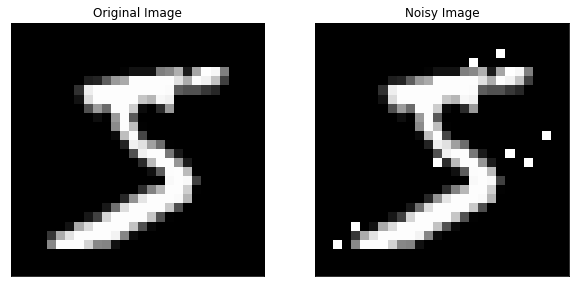

In [73]:
image_list = []
image_list.append([x_train[0], 'Original Image', 'img'])
image_list.append([noisy_train[0], 'Noisy Image', 'img'])
plotter(image_list,1,2,True,10,10)